<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



### Integrantes

* Carignano, Hugo
* Díaz, Federico
* Villafañe, Roxana

<a name="exploratory_data_analysis"></a>
## **Consignas para la materia  Exploración y Curación de Datos**

### 1 General 
*FECHA LíMITE DE ENTREGA: 07/07*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia "Exploración y Curación de Datos". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Exploración y Curación de las variables
En el proceso de obtención de los datos se pueden generar errores por las herramientas de etiquetado y por las personas que lo realizan. Entonces en este entrega se propone que realicen un proceso de exploración y curación de los datos,teniendo en cuenta lo visto en clase. 
  
#### Actividades para corregir errores e inconsistencias de las tablas de datos:
Para esta actividad utilicen el dataFrame de los datos de train modificado (dataSet_train_crop_features_labels_wError.csv) y una ves curado realizar una comparación con el original (a modo de refencia). 

   * Chequeen los tipos de datos. ¿Se corresponden a lo esperado? 
   * Tomar porciones aleatorias del dataframe para ver si van descubriendo inconsistencias, vayan notándolas y proponiendo como solucionarlas.
   * Cuántas imágenes originales tienen en total?
   * Chequeen valores nulos, extremos y duplicados. ¿Qué hacemos con ellos? ¿Podemos eliminarlos? 
   * Si no los eliminan, ¿qué estrategia utilizarían para imputarlos? Esto serviría para cualquier clase de datos?
   * Verificar si los tipos de clase de los objeto son los esperados. Puede haber errores de anotación.
   
**Nota: como ayuda para la curación, recordar que cada fila del dataFrame pertenece a un objeto en una imágen que fue obtenida de una secuencia de imágenes (videos). Es decir, las imágenes consecutivas suelen diferir muy poco entre si.** 

Tener presente que el objetivo no es realizar una curación a mano sino en forma automatizada, empleando las herramientas vistas en clase.

    
#### Actividades para exploración:     
Con los datos ya curados, utilizando los dos dataset (train y test) y en base a las conclusiones de la entrega anterior, responder las siguientes preguntas, fundamentar con los análisis y gráficas correspondientes: 

   * ¿Se puede aplicar One-Hot encodign? ¿A que variables?
   * ¿Se observó algún tipo de segos en los datos?¿Como los curaria? 
   * ¿Como solucionar los outliers?
   * ¿A que variables del dataFrame se les puede aplicar PCA? Realizar un analis con las gráficas correspondientes. 
   * Aplicar power transoformer a las variables que considere. ¿Que resultados se pueden obtener? 

Recuerden que las columnas 0 a 2048 se corresponden al *'feature vector'* de la imagen. Es decir, es una representación *'densa'* de la misma.

   * ¿Toman valores mayores a 1 o negativos? ¿Eso qué implica? 
   
Cada imagen pertence a una secuencia de imágenes determinanda (video), 
   * ¿Qué videos aportan mas diversidad y cuales son mas de lo mismo?. 

Recuerden de trabajar sobre una copia de la tabla así siempre pueden volver a comenzar si así fuera necesario. Vayan llevando las correcciones a cabo de manera clara. 

Además de lo que dieron en las clases, pueden fijarse diferentes en el siguiente [link](https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/) otros enfoques.

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [ ]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os

#from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import OneHotEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Mentoría-imágenes/dataset/')


Cargamos los datos a ser curados:

In [ ]:
dataset_train_werror_ = pd.read_csv('dataSet_train_crop_features_labels_wError.csv', low_memory=False, index_col=0)
dataset_train_werror_.head()

filename  width  ...      2047 new
0     Video1-frame-000001_single_box_0.jpg    640  ...  0.002943   0
1951  Video1-frame-000001_single_box_0.jpg    640  ...  0.002943   0
1952  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1983  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1918  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0

[5 rows x 2064 columns]

In [ ]:
dataset_train_werror = pd.read_csv('dataSet_train_crop_features_labels_wError.csv', low_memory=False, index_col=0) #porqué low? no hay por qué. Sino no reconoce algunos tipos de columnas sino
dataset_train_werror.head()

filename  width  ...      2047 new
0     Video1-frame-000001_single_box_0.jpg    640  ...  0.002943   0
1951  Video1-frame-000001_single_box_0.jpg    640  ...  0.002943   0
1952  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1983  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1918  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0

[5 rows x 2064 columns]

Evaluamos algunas estadísticas descriptivas de las variables del dataset_train_werror y observamos que los datos se corresponden con lo esperado

In [ ]:
dataset_train_werror.describe()

width       height  ...         2047          new
count  2032.000000  2032.000000  ...  2032.000000  2032.000000
mean    888.917323   535.598425  ...     0.134688     0.008366
std     498.131229   311.164627  ...     0.144141     0.091106
min     400.000000   224.000000  ...     0.000000     0.000000
25%     640.000000   360.000000  ...     0.032155     0.000000
50%     640.000000   360.000000  ...     0.084090     0.000000
75%    1280.000000   720.000000  ...     0.183476     0.000000
max    1920.000000  1080.000000  ...     1.216745     1.000000

[8 rows x 2060 columns]

Determinamos el número de filas y columnas que contiene el dataset_train_werror

In [ ]:
dataset_train_werror_.shape

(2032, 2064)

El dataset dataset_train_werror contiene 2032 filas y 2064 columnas, recordemos que el dataset de referencia original contenía 1913 filas x 2064 columnas 

Con la función sample pueden ir recorriendo el dataFrame para encontrar anomalias en el mismo:

In [ ]:
dataset_train_werror_.sample(10) 

filename  width  ...      2047 new
1515  video4-frame-000590_single_box_0.jpg   1920  ...  0.055861   0
608   Video2-frame-000016_single_box_0.jpg    640  ...  0.122805   0
597   Video2-frame-000010_single_box_1.jpg    640  ...  0.007070   0
214   Video1-frame-000357_single_box_2.jpg    640  ...  0.015869   0
1733  video7-frame-000287_single_box_0.jpg    480  ...  0.017098   0
980   Video3-frame-000275_single_box_1.jpg    640  ...  0.062516   0
109   Video1-frame-000184_single_box_0.jpg    640  ...  0.071124   0
762   Video2-frame-000305_single_box_0.jpg    640  ...  0.098044   0
794   Video3-frame-000089_single_box_6.jpg    640  ...  0.017206   0
1151  Video8-frame-000777_single_box_0.jpg    400  ...  0.049733   0

[10 rows x 2064 columns]

A simple vista podemos ver que la variable "clase" tiene errores en su nomenclatura, estas filas con errores podrían ser eliminadas para que no afecten los análisis posteriores

Para la columna "clase":

In [ ]:
claseuniq = dataset_train_werror_.clase.nunique()
claseuniq

5

Esperábamos obtener solo dos clases ccb (con barbijo) y csb (sin barbijo) pero hay presentes cinco (5) clases, posiblemente debido a errores durante el etiquetado de los recortes de imágenes. 

In [ ]:
claseuniq = dataset_train_werror_.clase.unique()
claseuniq

array(['csb', 'ccb', 'CcB', 'CsB', 'CCb', nan], dtype=object)

In [ ]:
dataset_train_werror_.clase.value_counts()

ccb    1435
csb     520
CcB      29
CsB      20
CCb      16
Name: clase, dtype: int64

In [ ]:
dataset_train_werror_.clase.isna().sum() #tambien tenemos 12 valores perdidos o nulos

12

Veamoslo en un gráfico de barras

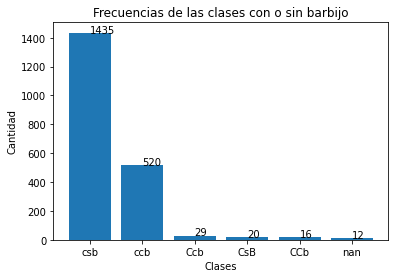

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["csb", "ccb", "Ccb",
         "CsB", "CCb", "nan"]
    y = [1435, 520, 29, 20,
         16, 12]
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Frecuencias de las clases con o sin barbijo")
      
    # giving X and Y labels
    plt.xlabel("Clases")
    plt.ylabel("Cantidad")
      
    # visualizing the plot
    plt.show()

También, procedimos a evaluar la existencia de imágenes duplicadas en el dataset utilizando la columna "filename" 

In [ ]:
duplicated = dataset_train_werror_[dataset_train_werror_.duplicated()]
duplicated

filename  width  ...      2047 new
1951  Video1-frame-000001_single_box_0.jpg    640  ...  0.002943   0
1983  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1918  Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1     Video1-frame-000002_single_box_0.jpg    640  ...  0.016324   0
1953  Video1-frame-000003_single_box_0.jpg    640  ...  0.022648   0
...                                    ...    ...  ...       ...  ..
1982  video7-frame-000255_single_box_0.jpg    480  ...  0.251235   0
1738  video7-frame-000301_single_box_0.jpg    480  ...  0.581734   0
1950  video7-frame-000319_single_box_0.jpg    480  ...  0.222800   0
1743  video7-frame-000334_single_box_0.jpg    480  ...  0.230920   0
1745  video7-frame-000347_single_box_0.jpg    480  ...  0.024500   0

[101 rows x 2064 columns]

Contamos el número de veces que cada nombre de archivo se encuentra repetido

In [ ]:
dNcount = duplicated.filename.groupby([duplicated.filename]).count()
dNcount

filename
Video1-frame-000001_single_box_0.jpg    1
Video1-frame-000002_single_box_0.jpg    3
Video1-frame-000003_single_box_0.jpg    3
Video1-frame-000014_single_box_0.jpg    1
Video1-frame-000016_single_box_0.jpg    1
                                       ..
video7-frame-000255_single_box_0.jpg    1
video7-frame-000301_single_box_0.jpg    1
video7-frame-000319_single_box_0.jpg    1
video7-frame-000334_single_box_0.jpg    1
video7-frame-000347_single_box_0.jpg    1
Name: filename, Length: 89, dtype: int64


Contamos la cantidad de entradas en la variable "filename" que corresponden a imágenes no repetidas (únicas)

In [ ]:
dataset_train_werror_.filename.nunique()

1913

Obtenemos el nombre de las imágenes repetidas

In [ ]:
unique_filename = dataset_train_werror_.filename.unique()
unique_filename

array(['Video1-frame-000001_single_box_0.jpg',
       'Video1-frame-000002_single_box_0.jpg',
       'Video1-frame-000003_single_box_0.jpg', ...,
       'video9-frame-000302_single_box_0.jpg',
       'video9-frame-000303_single_box_0.jpg',
       'video9-frame-000304_single_box_0.jpg'], dtype=object)

Hasta el momento vimos que la variable "clase" contiene errores en la nomenclatura de las clases y la presencia de imágenes repetidas o duplicadas. Ahora exploramos la presencia de valores nulos dentro de v
cada variable del dataset



In [ ]:
missing_values_count = dataset_train_werror_.isnull().sum()
missing_values_count[missing_values_count > 0] 

clase    12
xmin     17
xmax     12
ymin     25
ch_R     14
ch_G     16
ch_B     19
dtype: int64

¿Cuantos imagenes provienen de los videos que tenemos en el dataset con errores?





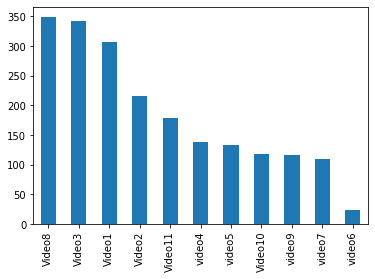

In [ ]:
dataset_train_werror['videoname'].value_counts().plot(kind='bar');

Por ejemplo para la columna "clase" tenemos:

In [ ]:
null = dataset_train_werror_[dataset_train_werror.clase.isnull()]
null

filename  width  ...      2047 new
1137  Video8-frame-000606_single_box_0.jpg    400  ...  0.057060   0
1138  Video8-frame-000684_single_box_0.jpg    400  ...  0.079542   0
1996  Video8-frame-000684_single_box_0.jpg    400  ...  0.079542   0
1139  Video8-frame-000685_single_box_0.jpg    400  ...  0.111341   0
1140  Video8-frame-000686_single_box_0.jpg    400  ...  0.275111   0
1345  Video8-frame-001544_single_box_0.jpg    400  ...  0.193656   0
2031  Video8-frame-001545_single_box_0.jpg    400  ...  0.058196   1
1346  Video8-frame-001545_single_box_0.jpg    400  ...  0.058196   0
1347  Video8-frame-001546_single_box_0.jpg    400  ...  0.044698   0
1845  video9-frame-000193_single_box_0.jpg   1280  ...  0.089428   0
1846  video9-frame-000193_single_box_1.jpg   1280  ...  0.078318   0
1847  video9-frame-000193_single_box_2.jpg   1280  ...  0.115494   0

[12 rows x 2064 columns]

Posteriormente, evaluamos la presencia de valores extremos en las distintas variables del dataset. Para este fin, podemos utilizar herramientas gráficas como Histogramas o Box-plot. En nuestro caso visualizamos la distribución de las variables mediante la utilización de Histogramas. 

In [ ]:
#creamos un subset del dataframe que vamos a plotear secuencialmente histogramas
train_werror = dataset_train_werror[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]
train_werror.head()

width  height   xmin  ...        ch_R        ch_G        ch_B
0       640     360  304.0  ...  191.840561  153.567825  132.866669
1951    640     360  304.0  ...  191.840561  153.567825  132.866669
1952    640     360  300.0  ...  183.752380  146.789627  126.877037
1983    640     360  300.0  ...  183.752380  146.789627  126.877037
1918    640     360  300.0  ...  183.752380  146.789627  126.877037

[5 rows x 11 columns]

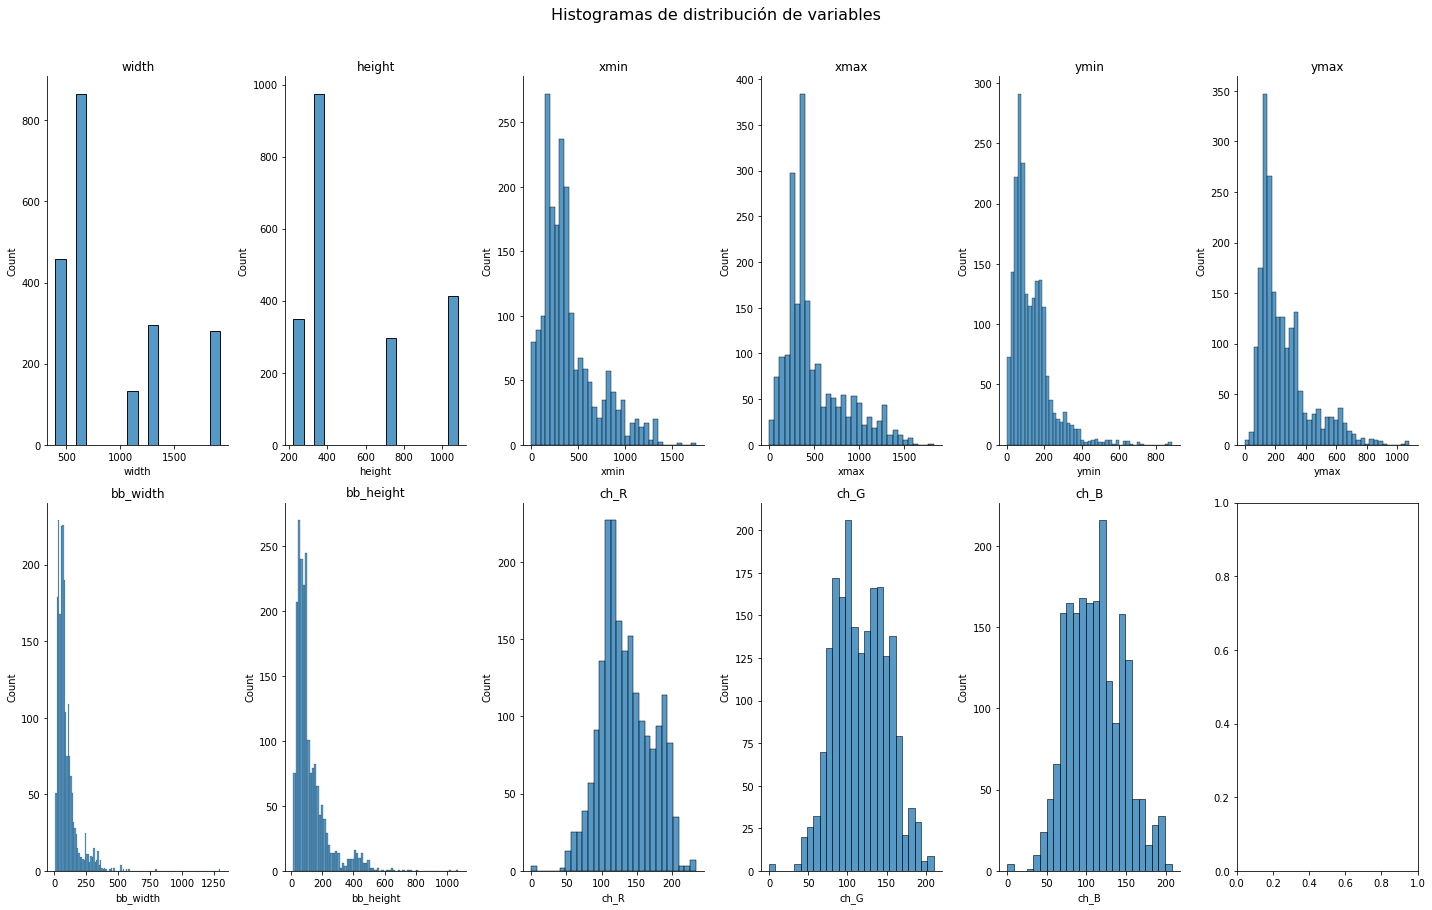

In [ ]:
fig, axes = plt.subplots(2,6,figsize=(20,12))
axes = axes.ravel()
for i, col in enumerate(train_werror.columns):
    axes[i].set_title(f'{col}')
    sns.histplot(ax=axes[i], x=train_werror[col],)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

fig.suptitle('Histogramas de distribución de variables', fontsize=16, y=1.05)
fig.subplots_adjust(hspace=0.3)

fig.tight_layout();


Tomamos unos ejemplos del conjunto de "features" disponibles en el dataset, por ejemplo las variables de 0 a 9.

#### Variables de la ResNet10

A continuación se plotean las 10 primeras variables de las ResNet10, en forma de histograma para ver su distribución. 

In [ ]:
train_werror1 = dataset_train_werror_.iloc[:, 15:25]
train_werror1.head()


0         1         2  ...         7         8         9
0     0.003306  0.110736  0.085072  ...  0.345855  0.174702  0.142799
1951  0.003306  0.110736  0.085072  ...  0.345855  0.174702  0.142799
1952  0.051257  0.181405  0.080709  ...  0.259773  0.165444  0.131570
1983  0.051257  0.181405  0.080709  ...  0.259773  0.165444  0.131570
1918  0.051257  0.181405  0.080709  ...  0.259773  0.165444  0.131570

[5 rows x 10 columns]

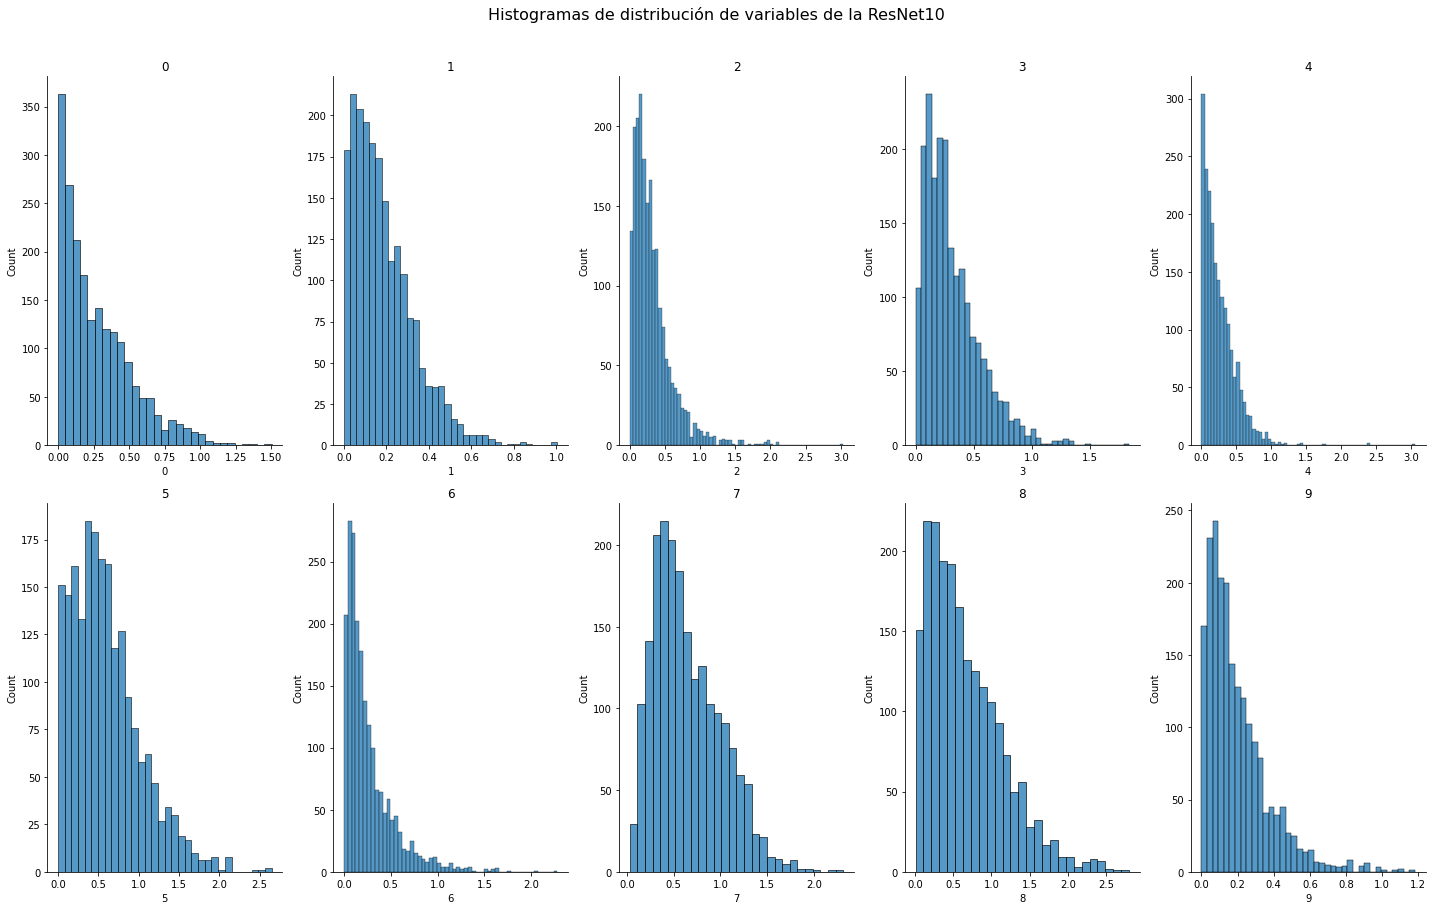

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(20,12))
axes = axes.ravel()
for i, col in enumerate(train_werror1.columns):
    axes[i].set_title(f'{col}')
    sns.histplot(ax=axes[i], x=train_werror1[col],)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

fig.suptitle('Histogramas de distribución de variables de la ResNet10', fontsize=16, y=1.05)
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(top=4)

fig.tight_layout();

* **Análisis de los valores nulos, duplicados y extremos**


La cantidad de valores nulos y duplicados presentes en el set de datos "dataset_train_werror" es reducida en comparación a la cantidad de datos disponibles, por lo que la eliminación de los mismos no afectaría los análisis posteriores. En cuanto a la presencia de valores extremos, si consideramos que estos valores atípicos no se deben a un error a la hora de construir la base de datos o en la medición de las variables, eliminarlos no sería la solución. Su eliminación podría modificar la distribución de las variables y, por lo tanto, introducir sesgos en los análisis. Una alternativa para su tratamiento podría ser el escalado/normalizado adecuado de las variables. Si quisieramos eliminarlos podríamos establecer un valor de corte para cada variable, por ejemplo, eliminar valores que se encuentren a X desvíos estándar de la media para cada variable

* *Imputación de valores*

En el caso de querer imputar valores faltantes, para las variables númericas se podría utilizar una imputación a la mediana o la media de la variable. En el caso de variables discretas, como medida general se podría utilizar una imputación al valor mas frecuente o moda de la variable. 

#### Volvemos a los set de datos analizados en TP.1 

En la siguiente actividad, trabajamos con el conjunto de datos ya curado, tanto el set de "train" como el de "test"

In [ ]:
dataset_train_ = pd.read_csv('dataSet_train_crop_features_labels.csv', low_memory=False, index_col=0) #porqué low? no hay por qué. Sino no reconoce algunos tipos de columnas sino

In [ ]:
dataset_train.head(5)

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

Observando las variables presentes en el dataset "train" curado la transformación One-Hot encodign, la cual es aplicada a variables discretas, podría ser utilizada para transformar la columna correspondiente a "Videoname".

En la evaluación de posibles sesgos presentes en el dataset, decidimos interrogar si el número de recortes de imágenes provenientes de cada video es equilibrada en el dataset.

In [ ]:
dataset_videoname_train = dataset_train.groupby('videoname').agg(recortes=pd.NamedAgg(column="videoname", aggfunc="size"))

In [ ]:
dataset_videoname_train

recortes
videoname          
Video1          286
Video10         115
Video11         178
Video2          195
Video3          323
Video8          302
video4          139
video5          132
video6           24
video7          102
video9          117

In [ ]:
dataset_train['videoname'].value_counts().plot(kind='bar');

In [ ]:
dataset_test_ = pd.read_csv('dataSet_test_crop_features_labels.csv', low_memory=False) 
dataset_test = dataset_test_.drop(['Unnamed: 0'], axis=1)

In [ ]:
dataset_videoname_test = dataset_test.groupby('videoname').agg(recortes=pd.NamedAgg(column="videoname", aggfunc="size"))

In [ ]:
dataset_videoname_test

recortes
videoname          
Video1           78
Video10          27
Video11          45
Video2           46
Video3           72
Video8           72
video4           46
video5           48
video6            5
video7           24
video9           32

In [ ]:
dataset_test['videoname'].value_counts().plot(kind='bar');

Como resultado, observamos que los videos 1, 3 y 8 tienen entre el doble y el triple de recortes de imágenes que el resto de los videos.

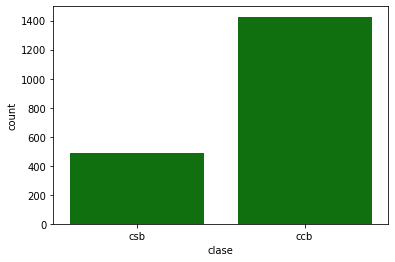

In [ ]:
sns.countplot(data=dataset_train, x='clase', color='green')

Otro sesgo presente en el dataset es que el número de clases ccb (con barbijo) es aproximadamente tres veces la clase csb (sin barbijo)

Ambos tipos de sesgos podrían ser solucionados incorporando un mayor número de recortes de distintos videos que representen la clase csb.

Los outliers o valores extremos del dataset podrían ser eliminados como mencionamos anteriormente o pueden ser escalados con un método robusto de manera que no introduzcan desvíos en los análisis subsiguientes.  

### One-Hot Encoding de variables

En esta etapa se realizó una codificación de tipo One-Hot Encoding para la variable de las clases, y tambien la variable de video. 
En general, una codificación de tipo One-Hot se aplica a variables cualitativas. Si bien es una buena tecnica para variables cualitativas, hay que tener en cuenta que al tener muchas posibilidades dentro de una misma variable, esto puede llegar a crear muchas columnas, y traer como consecuencia tener que trabajar en altas dimensiones. 

In [ ]:
#primero seleccionamos las variables categoricas
categorical_data = dataset_train[['clase', 'videoname']]
categorical_data.head(5)

clase videoname
0   csb    Video1
1   csb    Video1
2   csb    Video1
3   csb    Video1
4   csb    Video1

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(categorical_data)


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
encoded_types = encoder.transform(categorical_data)
encoded_types[:10]

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
categorical_feat = ['clase', 'videoname']

In [ ]:
#veamoslo en un pandas DataFrame
encoded_df = pd.DataFrame(data=encoded_types, columns=encoder.get_feature_names(categorical_feat))
encoded_df.head(7)

clase_ccb  clase_csb  ...  videoname_video7  videoname_video9
0        0.0        1.0  ...               0.0               0.0
1        0.0        1.0  ...               0.0               0.0
2        0.0        1.0  ...               0.0               0.0
3        0.0        1.0  ...               0.0               0.0
4        0.0        1.0  ...               0.0               0.0
5        0.0        1.0  ...               0.0               0.0
6        0.0        1.0  ...               0.0               0.0

[7 rows x 13 columns]

### Power Transformations + PCA

Para el análisis de reducción de dimensionalidad (PCA) es necesario trabajar con las variables numéricas y, además, estas variables necesitan ser normalizadas de manera que todas se encuentren en la misma escala 

In [ ]:
#TRAIN
dataset_train_numeric = dataset_train._get_numeric_data()
dataset_train_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0       640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1       640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2       640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3       640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4       640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094
...     ...     ...   ...   ...  ...       ...       ...       ...       ...
1908   1280     720  1168  1280  ...  0.278505  0.189561  0.501087  0.132643
1909   1280     720  1047  1231  ...  0.205289  0.409898  0.912477  0.043854
1910   1280     720   974  1151  ...  0.162134  0.758789  0.849687  0.150298
1911   1280     720   902  1074  ...  0.440513  0.482803  0.638911  0.262574
1912   1280     720   771   939  ...  0.207461  0.376891  0.677032  0.001313

[1913 rows x 2059 columns]

Se aplica el método "power transformer" a las variables numéricas del dataset "train".

In [ ]:
dataset_train_numeric_norm = sklearn.preprocessing.power_transform(dataset_train_numeric, method='yeo-johnson', standardize=True, copy=True)

In [ ]:
#TEST
dataset_test_numeric = dataset_test._get_numeric_data()
dataset_test_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0      640     360   301   364  ...  0.034357  0.005899  0.499648  0.015035
1      640     360   302   372  ...  0.026713  0.041257  0.372580  0.057565
2      640     360   302   370  ...  0.067228  0.011203  0.631417  0.047634
3      640     360   304   366  ...  0.011560  0.000363  0.583134  0.020465
4      640     360   301   370  ...  0.011605  0.015202  0.616542  0.032798
..     ...     ...   ...   ...  ...       ...       ...       ...       ...
490   1280     720   781   856  ...  0.106780  0.134364  0.511100  0.039986
491   1280     720   634   825  ...  0.150524  0.533963  0.263250  0.056921
492   1280     720   635   838  ...  0.162843  0.578889  0.408409  0.063361
493   1280     720   635   830  ...  0.174382  0.584406  0.256982  0.021594
494   1280     720   408   643  ...  0.222247  0.524002  1.120981  0.179200

[495 rows x 2059 columns]

Se aplica el método "power transoformer" a las variables numéricas del dataset "test".

In [ ]:
dataset_test_numeric_norm = sklearn.preprocessing.power_transform(dataset_test_numeric, method='yeo-johnson', standardize=True, copy=True)

Una vez que disponemos de un conjunto de datos confiable nos interesa inferir cuales son las variables que pueden estar mas relacionadas o que inluyen en mayor medida sobre la capacidad detección del objeto de interés sobre una imagen. Una de las alternativas más simples es realizar un análisis de componentes principales (o de reducción de la dimensionalidad) sobre el set de datos y evaluar visualmente que componentes capturan la mayor variabilidad en los datos. Para esto, primero seleccionamos 12 de las variable numéricas (sin considerar aquellas variables obtenidas mediante el uso de la red neuronal) y realizamos el análisis PCA sobre el dataset "train" y "test"

### PCA Resumido

Train:

In [ ]:
dataset_train_res = dataset_train[['width', 'height', 'xmin', 'xmax','ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [ ]:
dataset_train_res_num = dataset_train_res._get_numeric_data()
dataset_train_res_num

width  height  xmin  xmax  ...  bb_height        ch_R        ch_G        ch_B
0       640     360   304   359  ...         78  191.840561  153.567825  132.866669
1       640     360   300   363  ...         75  183.752380  146.789627  126.877037
2       640     360   301   368  ...         81  175.958160  141.141510  121.987831
3       640     360   304   364  ...         84  187.911713  150.097229  129.374207
4       640     360   300   366  ...         87  173.947571  139.453323  120.885750
...     ...     ...   ...   ...  ...        ...         ...         ...         ...
1908   1280     720  1168  1280  ...        209   92.318436   89.827538   75.665024
1909   1280     720  1047  1231  ...        239   89.923820   82.779854   66.247177
1910   1280     720   974  1151  ...        230   98.103539   92.070747   74.903046
1911   1280     720   902  1074  ...        277   97.310684   88.274559   71.620628
1912   1280     720   771   939  ...        274  105.734138   94.655632   76.496498

[1913 rows x 11 columns]

Escalamos las variables numéricas seleccionadas

In [ ]:
dataset_train_res_numnor = sklearn.preprocessing.power_transform(dataset_train_res_num, method='yeo-johnson', standardize=True, copy=True)

Calculamos 10 componentes principales utilizando el dataset "train" resumido



In [ ]:
pca_train_res = PCA(n_components=10)
pca_train_res.fit(dataset_train_res_numnor)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_train_res_pca = pca_train_res.transform(dataset_train_res_numnor)

In [ ]:
print("original shape:   ", dataset_train_res_numnor.shape)
print("transformed shape:", pca_train_res_pca.shape)

original shape:    (1913, 11)
transformed shape: (1913, 10)


Test:

In [ ]:
dataset_test_res = dataset_test[['width', 'height', 'xmin', 'xmax','ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [ ]:
dataset_test_res_num = dataset_test_res._get_numeric_data()
dataset_test_res_num

width  height  xmin  xmax  ...  bb_height        ch_R        ch_G        ch_B
0      640     360   301   364  ...         75  186.534821  149.401276  128.560852
1      640     360   302   372  ...         92  167.621277  133.989441  115.107605
2      640     360   302   370  ...         78  173.094269  136.082397  116.621796
3      640     360   304   366  ...         86  169.174225  133.446930  115.077080
4      640     360   301   370  ...         71  178.161057  141.876297  121.297821
..     ...     ...   ...   ...  ...        ...         ...         ...         ...
490   1280     720   781   856  ...         95  122.217690  116.598877  118.055161
491   1280     720   634   825  ...        262  139.187546  143.241516  146.184280
492   1280     720   635   838  ...        240  131.826675  137.758987  142.295822
493   1280     720   635   830  ...        232  134.150284  140.153351  144.646851
494   1280     720   408   643  ...        342  131.678009  122.339935  115.894287

[495 rows x 11 columns]

In [ ]:
dataset_test_res_numnor = sklearn.preprocessing.power_transform(dataset_test_res_num, method='yeo-johnson', standardize=True, copy=True)

Calculamos 10 componentes principales utilizando el dataset "test" resumido

In [ ]:
pca_test_res = PCA(n_components=10)
pca_test_res.fit(dataset_test_res_numnor)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_test_res_pca = pca_test_res.transform(dataset_test_res_numnor)

In [ ]:
print("original shape:   ", dataset_test_res_numnor.shape)
print("transformed shape:", pca_test_res_pca.shape)

original shape:    (495, 11)
transformed shape: (495, 10)


Utilizamos las dos primeras PCs para realizar los gráficos (PC1 vs PC2) y para una mejor visualización coloreamos en el gráfico a cada recorte de imagen de acuerdo a su video de origen ("Videoname") y/o si pertenece a la clase ccb (con barbijo) o csb (sin barbijo). Todos los análisis se hacen considerando el dataset "train" y "test"

In [ ]:
set(dataset_train.videoname)
colors = {"Video1": "black", "Video2": "bisque", "Video3": "forestgreen", "video4": "grey", "video5": "brown", "video6": "gold", "video7": "magenta", "Video8": "cyan", "video9": "indigo", "Video10": "darkblue", "Video11": "gainsboro"}
img_color = dataset_train.videoname.map(colors)

In [ ]:
set(dataset_test.videoname)
colors_test = {"Video1": "black", "Video2": "bisque", "Video3": "forestgreen", "video4": "grey", "video5": "brown", "video6": "gold", "video7": "magenta", "Video8": "cyan", "video9": "indigo", "Video10": "darkblue", "Video11": "gainsboro"}
img_color_test = dataset_test.videoname.map(colors)
colors_test


{'Video1': 'black',
 'Video10': 'darkblue',
 'Video11': 'gainsboro',
 'Video2': 'bisque',
 'Video3': 'forestgreen',
 'Video8': 'cyan',
 'video4': 'grey',
 'video5': 'brown',
 'video6': 'gold',
 'video7': 'magenta',
 'video9': 'indigo'}

In [ ]:
set(dataset_train.clase)
colors2 = {"ccb": "red", "csb": "green"}
img_color_clase = dataset_train.clase.map(colors2)
colors2

{'ccb': 'red', 'csb': 'green'}

In [ ]:
set(dataset_test.clase)
colors_test2 = {"ccb": "red", "csb": "green"}
img_color_clase_test = dataset_test.clase.map(colors_test2)



Graficamos PC1 vs PC2 para "train" y "test", indicando a que Video corresponde el recorte de imágen y la clase (ccb o csb)

#### Training data según video

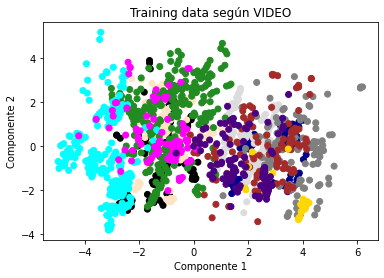

In [ ]:
#TRAIN según Videoname
fig, ax = plt.subplots()
ax.scatter(pca_train_res_pca[:, 0], pca_train_res_pca[:, 1], c = img_color)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Training data según VIDEO");
plt.show()

En este caso vemos una separación pobre, lo que nos da idea que el video no es una buena variable categórica para formar grupos en un espacio euclideo como en el cual trabaja la PCA

#### Training data según CLASE

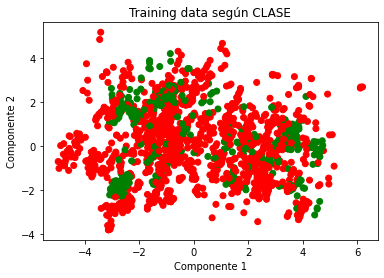

In [ ]:
#TRAIN según Clase
fig, ax = plt.subplots()
ax.scatter(pca_train_res_pca[:, 0], pca_train_res_pca[:, 1], c = img_color_clase)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Training data según CLASE");
plt.show()

A diferencia de la imagen anterior, si bien se observa que están mezclados los puntos provenientes de ambos grupos, la variable CLASE sí podria ser una buena variable categórica para clasificación. 

#### Testing segun video 

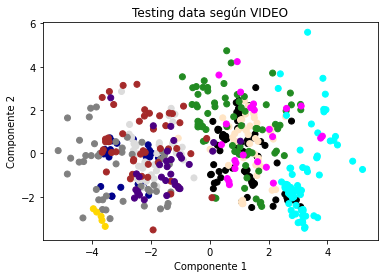

In [ ]:
#TEST según Videoname
fig, ax = plt.subplots()
ax.scatter(pca_test_res_pca[:, 0], pca_test_res_pca[:, 1], c = img_color_test)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Testing data según VIDEO");
plt.show()

Se observan menos puntos ya que son menos datos que en train, pero la tendencia a estar mezclados se mantiene. 

#### Testing según CLASE

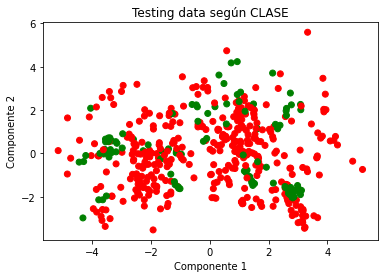

In [ ]:
#TEST según Clase
fig, ax = plt.subplots()
ax.scatter(pca_test_res_pca[:, 0], pca_test_res_pca[:, 1], c = img_color_clase_test)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Testing data según CLASE");
plt.show()

En este gráfico también se observan menos puntos, y la distribución de puntos es similar a los datos de train. 

En los gráficos observamos que con las 12 variables seleccionadas y luego del análisis de PCA no fue posible agrupar cada uno de los recortes en su clase de pertenencia esperada. Por otro lado, no parece haber un efecto de video de origen de los recortes en el agrupamiento

### PCA Completo

**Ahora, realizamos el análisis de PCA pero utilizando el dataset completo (incluyendo todas las variables presentes)**

En esta etapa se repitieron los calculos para poder obtener las PC correspondientes. 

#### Training

In [ ]:
pca_train = PCA(n_components=10)
pca_train.fit(dataset_train_numeric_norm)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_train_pca = pca_train.transform(dataset_train_numeric_norm)

In [ ]:
print("original shape:   ", dataset_train_numeric_norm.shape)
print("transformed shape:", pca_train_pca.shape)

original shape:    (1913, 2059)
transformed shape: (1913, 10)


In [ ]:
print(pca_train.explained_variance_ratio_)

[0.15270305 0.0759144  0.04598545 0.04221065 0.03574368 0.02914979
 0.02688318 0.02252828 0.01923132 0.01720837]


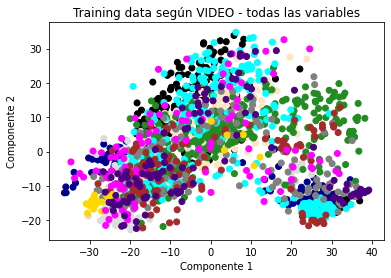

In [ ]:

fig, ax = plt.subplots()
ax.scatter(pca_train_pca[:, 0], pca_train_pca[:, 1], c = img_color)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Training data según VIDEO - todas las variables");
plt.show()

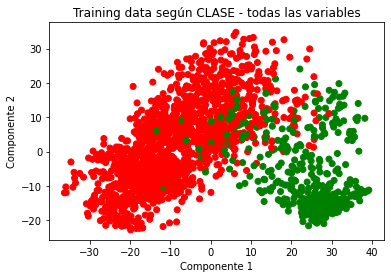

In [ ]:
fig, ax = plt.subplots()
ax.scatter(pca_train_pca[:, 0], pca_train_pca[:, 1], c = img_color_clase)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Training data según CLASE - todas las variables");
plt.show()

#### Testing

In [ ]:
pca_test = PCA(n_components=10)
pca_test.fit(dataset_test_numeric_norm)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_test_pca = pca_test.transform(dataset_test_numeric_norm)

In [ ]:
print("original shape:   ", dataset_test_numeric_norm.shape)
print("transformed shape:", pca_test_pca.shape)

original shape:    (495, 2059)
transformed shape: (495, 10)


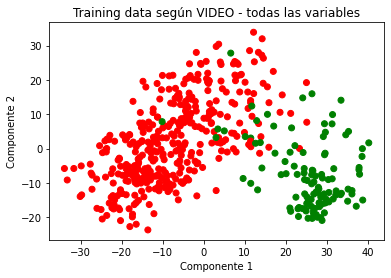

In [ ]:
fig, ax = plt.subplots()
ax.scatter(pca_test_pca[:, 0], pca_test_pca[:, 1], c = img_color_clase_test)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Training data según VIDEO - todas las variables");

plt.show()

En este caso, cuando tomamos todas las variables numéricas los recortes de imágenes agrupan aproximadamente de acuerdo a su clase correcta. 

*ANOVA F TEST*

Por último, utilizamos un análisis de la variancia ANOVA F test de manera de evaluar cuales de las variables numéricas se encuentran más relacionadas con las clases con barbijo/sin barbijo. Nos quedamos con las 10 variables que tienen el mayor score para este análisis y realizamos nuevamente el análisis de PCA.

In [ ]:
y_train = dataset_train.loc[:,'clase']
y_train

0       csb
1       csb
2       csb
3       csb
4       csb
       ... 
1908    ccb
1909    ccb
1910    ccb
1911    ccb
1912    ccb
Name: clase, Length: 1913, dtype: object

In [ ]:
dataset_train_numeric_norm_new = SelectKBest(f_classif, k=10).fit_transform(dataset_train_numeric_norm, y_train)


In [ ]:
print('Original number of features:', dataset_train_numeric_norm.shape[1])
print('Reduced number of features:', dataset_train_numeric_norm_new.shape[1])

Original number of features: 2059
Reduced number of features: 10


Seleccionamos los 4 primeros PCs

In [ ]:
pca_train_selec = PCA(n_components=4)
pca_train_selec.fit(dataset_train_numeric_norm_new)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_train_selec_pca = pca_train_selec.transform(dataset_train_numeric_norm_new)

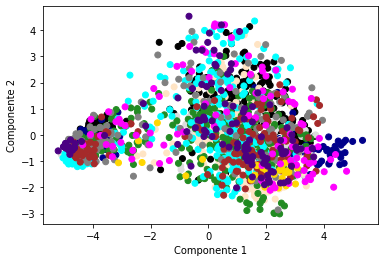

In [ ]:
fig, ax = plt.subplots()
ax.scatter(pca_train_selec_pca[:, 0], pca_train_selec_pca[:, 1], c = img_color)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2');
plt.show()

No handles with labels found to put in legend.


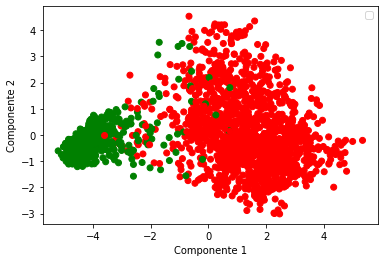

In [ ]:

plt.scatter(pca_train_selec_pca[:, 0], pca_train_selec_pca[:, 1], c = img_color_clase)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2');
plt.legend()
plt.show()

Seleccionando las 10 variables que se encuentran más relacionadas con la clasificación de clases obtenemos resultados similares a utilizar el set entero de variables.

Observamos cuales son las variables que se encuentran relacionadas con la clasificación con y sin barbijo en los recortes de imágenes analizados

In [ ]:
f_selector = SelectKBest(f_classif, k=10) 

X_kbest = f_selector.fit_transform(dataset_train_numeric_norm, y_train)

fit = f_selector.fit(dataset_train_numeric_norm, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset_train_numeric.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 50 best features
# Show results
print('Original number of features:', dataset_train_numeric_norm.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

     features        Score
409       398  2279.069529
1099     1088  2169.206615
709       698  2125.151661
1060     1049  2038.595389
1501     1490  1979.336488
181       170  1977.801276
827       816  1952.113279
1934     1923  1940.638081
855       844  1886.010796
49         38  1675.944504
Original number of features: 2059
Reduced number of features: 10


## Conclusión del trabajo

*Análisis del dataset sin curación*

En esta segunda entrega del trabajo el objetivo fue la exploración de un dataset similar al dataset de entrenamiento que tenía que ser curado debido a que presentaba:
* Inconsistencias en las etiquetas (errores en el etiquetado, o valores NaN). 
* Valores duplicados.

Este dataset también contenía más filas que el dataset_train que se analizó en el TP1. 

También se observó que poseía valores nulos en varias columnas, en total:
* clase=12
* xmin=17
* xmax=12
* ymin=25
* ch_R=14
* ch_G=16
* ch_B=19


*Análisis de los datasets curados*

Luego de realizar este análisis para observar inconsistencias en el dataset, se prosiguió en el análisis de los dataset de test y train. 

En esta etapa en primer lugar se hizo una codificación de tipo One-Hot para las variables categóricas (video y clase). Esto nos dio como resultado una matriz esparsa que podria ser utilizada como features para futuros modelos. 

Despues, se realizó un análisis de componentes principales, pero previamente a ello se realizaron transformaciones (power transformations) de tipo Yeo-Johnson para estandarizar los datos. 

Una vez con los datos estandarizados, se realizaron sucesivos análisis de componentes principales segun el train y el test, pintando según el video y según la clase, que son las dos variables categóricas que nos podrían interesar. 

En una primera etapa se trabajo con un subset de variables, las númericas, y en una segunda etapa se trabajaron con todas las variables, incluyendo las variables de la ResNet10. 

Se observa que mediante la variable categórica VIDEO no se observa agrupamiento que permita discriminar grupos en ninguno de todos los casos analizados, pero sí se observan grupos mas claramente definidos en las PC que tienen como agrupamiento la variable categórica CLASE cuando se consideran las variables de la ResNet10. 

